# Forecasting #

The longer you look back, the farther you can look forward. (Winston Churchill) 

Forecastig of the development of stocks is quite a challagning task with uncertain outcome. In these kind of situations 
it is of advantage to use scenarios to identify possible outcomes.

- Forecasting applying existing history data
- Forecasting of Global Trend (Bull or Bear)
- Forecasting of Crash
- Forecating of Individual Stocks Short Term

### Setup ###

In [1]:
%classpath config resolver maven-public http://software.pschatzmann.ch/repository/maven-public/
%classpath add mvn ch.pschatzmann:investor:0.9-SNAPSHOT
%classpath add mvn ch.pschatzmann:jupyter-jdk-extensions:0.0.1-SNAPSHOT


Added new repo: maven-public


In [2]:
// our stock evaluation framwork
import ch.pschatzmann.dates._;
import ch.pschatzmann.stocks._;
import ch.pschatzmann.stocks.data.universe._;
import ch.pschatzmann.stocks.input._;
import ch.pschatzmann.stocks.accounting._;
import ch.pschatzmann.stocks.accounting.kpi._;
import ch.pschatzmann.stocks.execution._;
import ch.pschatzmann.stocks.execution.fees._;
import ch.pschatzmann.stocks.execution.price._;
import ch.pschatzmann.stocks.parameters._;
import ch.pschatzmann.stocks.strategy._;
import ch.pschatzmann.stocks.strategy.optimization._;
import ch.pschatzmann.stocks.strategy.allocation._;
import ch.pschatzmann.stocks.strategy.selection._;
import ch.pschatzmann.stocks.integration._;
import ch.pschatzmann.stocks.forecasting._;
import ch.pschatzmann.stocks.integration.ChartData.FieldName._;
import ch.pschatzmann.stocks.strategy.OptimizedStrategy.Schedule._;


// java
import java.util.stream.Collectors;
import java.util._;
import java.lang._;
import java.util.function.Consumer;

// jupyter custom displayer
import ch.pschatzmann.display.Displayers

import ch.pschatzmann.dates._
import ch.pschatzmann.stocks._
import ch.pschatzmann.stocks.data.universe._
import ch.pschatzmann.stocks.input._
import ch.pschatzmann.stocks.accounting._
import ch.pschatzmann.stocks.accounting.kpi._
import ch.pschatzmann.stocks.execution._
import ch.pschatzmann.stocks.execution.fees._
import ch.pschatzmann.stocks.execution.price._
import ch.pschatzmann.stocks.parameters._
import ch.pschatzmann.stocks.strategy._
import ch.pschatzmann.stocks.strategy.optimization._
import ch.pschatzmann.stocks.strategy.allocation._
import ch.pschatzmann.stocks.strategy.selection._
import ch.pschatzmann.stocks.integration._
import ch.pschatzmann.stocks.forecasting._
import ch.pschatzmann.stocks.integration.ChartData.FieldName._
import ch.pschatzmann.stocks.strategy.Optimized...

In [3]:
Displayers.setup("WARN")

Context.setCachingActive(false);
Context.isCachingActive();


false

## Forecasting for AAPL ##

In [4]:
var aapl = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader());

var history = aapl.getHistory(Context.date("1995-01-01"))
Displayers.display(Context.tail(history,10));

index,date,low,high,open,closing,adjustmentFactor,volume
9345,2018-01-04,172.08,173.47,172.54,173.03,1,22434600
9346,2018-01-05,173.05,175.37,173.44,175,1,23660000
9347,2018-01-08,173.93,175.61,174.35,174.35,1,20567800
9348,2018-01-09,173.41,175.06,174.55,174.33,1,21584000
9349,2018-01-10,173,174.3,173.16,174.29,1,23959900
9350,2018-01-11,174.49,175.49,174.59,175.28,1,18667700
9351,2018-01-12,175.65,177.36,176.18,177.09,1,25418100
9352,2018-01-16,176.14,179.39,177.9,176.19,1,29565900
9353,2018-01-17,175.07,179.25,176.15,179.1,1,34386800
9354,2018-01-18,178.25,180.1,179.37,179.26,1,31035300



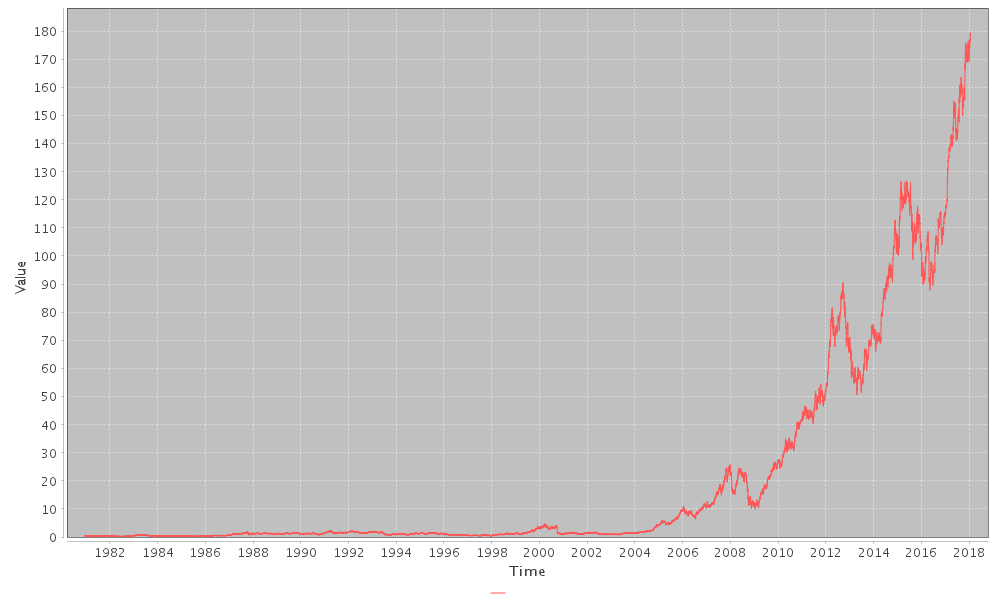

In [5]:
Displayers.display(new TimeSeriesChart().add(aapl).displayChart())


## Simulation of Future using the Past ##


One possiblity is to simulate the future based on the development of the past: Looking at the chart we can e.g.
investigate how our strategy would behave if we would be in a simialr position like on March 2015.

We simulate the future develpment based on the development starting from
- 2012-09-01 of the AAPL stock
- 2015-03-01 of the AAPL stock
- 2017-03-01 of the NYSE Composite Index 



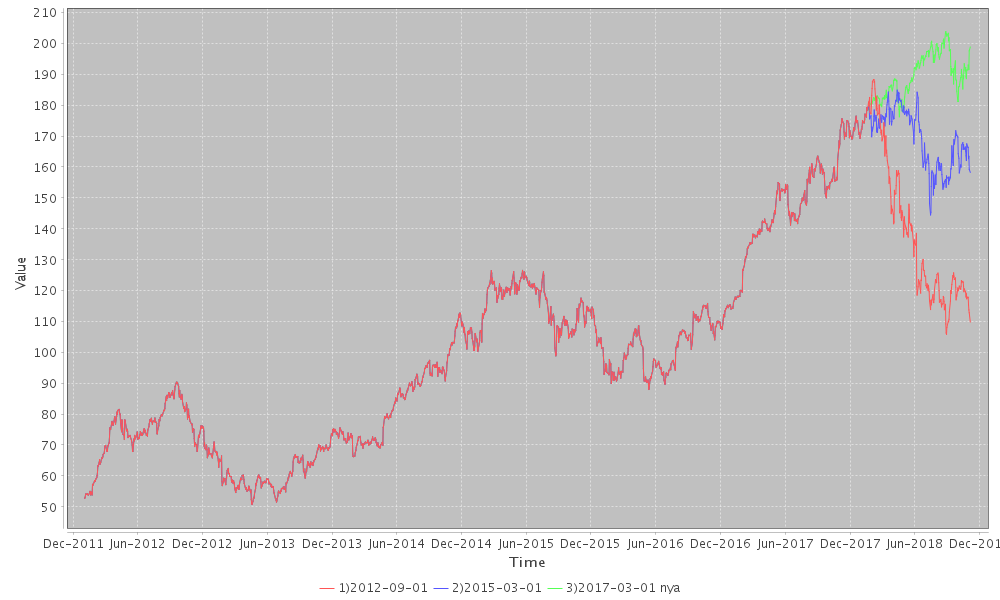

In [6]:
var nya = new StockData(new StockID("^NYA", "INDEX"), new MarketArchiveHttpReader());

var aapl = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader());
var aaplWithFuture1 = new ForecasterFromSimulationOnHistory(Context.date("2012-09-01")).forecast(aapl, 200)
var aaplWithFuture2 = new ForecasterFromSimulationOnHistory(Context.date("2015-03-01")).forecast(aapl, 200)
var aaplWithFuture3 = new ForecasterFromSimulationOnHistory(Context.date("2017-03-01"),nya).forecast(aapl, 200)

// display chart
var chart = new TimeSeriesChart()
var startDisplayDate = Context.date("2012-01-01")
chart.add(aaplWithFuture1.getHistory(startDisplayDate),"1)2012-09-01")
chart.add(aaplWithFuture2.getHistory(startDisplayDate),"2)2015-03-01")
chart.add(aaplWithFuture3.getHistory(startDisplayDate),"3)2017-03-01 nya")

Displayers.display(chart.displayChart())


### Result for Worst Case Option 1 ###

In [7]:
var dates = Context.getDateRanges("2018-01-01","2019-01-01");

var account1 = new Account("Simulation","USD", 100000.00, dates.get(0).getStart(), new PerTradeFees(10.0));
var aapl = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader());
var aaplWithFuture1 = new ForecasterFromSimulationOnHistory(Context.date("2012-09-01")).forecast(aapl, 200)
var strategy1 = new RSI2Strategy(aaplWithFuture1);
var trader1 = new PaperTrader(account1);
var state = new Fitness(trader1).getFitness(strategy1, dates.get(0));

state.result()

ReturnPercent:-14; NumberOfCashTransfers:1; AbsoluteReturn:-13978; RealizedGains:-13958; AbsoluteReturnStdDev:884; NumberOfTradedStocks:1; UnrealizedGains:0; MaxDrawDownPercent:26331; TotalFees:20; PurchasedValue:86022; ReturnPercentAnualized:-16; NumberOfSells:1; AbsoluteReturnAvaragePerDay:-65; MaxDrawDownLowValue:79938; NumberOfTrades:2; MaxDrawDownHighValue:106269; NumberOfBuys:1; Cash:86022; ReturnPurcentStdDev:0; SharpeRatio:-1; ActualValue:86022; MaxDrawDownNumberOfDays:189; 

In [8]:
Displayers.display(account1.getTransactions().collect(Collectors.toList()));


active stockID date quantity requestedPrice filledPrice fees comment id buyOrSell requestedPriceType impactOnCash true Key Value ticker Cash exchange Account 2018-01-01 0 0 0 0 9fe84be7-2115-4edb-94ec-1aff3a649bb4 NA CashTransfer 100000 true Key Value ticker AAPL exchange NASDAQ 2018-01-29 564 0 177.1629 10 14bfd012-7b50-4a18-b342-90d267707756 Buy Market -99929.898 true Key Value ticker AAPL exchange NASDAQ 2018-04-05 -564 0 152.4155 10 0d033ccb-47d2-47f8-b34c-b8db9ec70773 Sell Market 85952.3228

###  Result for Option 2 ###

In [9]:
var dates = Context.getDateRanges("2018-01-01","2019-01-01");

var account2 = new Account("Simulation","USD", 100000.00, dates.get(0).getStart(), new PerTradeFees(10.0));
var aapl = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader());
var aaplWithFuture2 = new ForecasterFromSimulationOnHistory(Context.date("2015-03-01")).forecast(aapl, 200)
var strategy2 = new RSI2Strategy(aaplWithFuture2);
var trader2 = new PaperTrader(account2);
var state2 = new Fitness(trader2).getFitness(strategy2, dates.get(0));

state2.result()

ReturnPercent:-7; NumberOfCashTransfers:1; AbsoluteReturn:-6522; RealizedGains:0; AbsoluteReturnStdDev:1023; NumberOfTradedStocks:1; UnrealizedGains:1620; MaxDrawDownPercent:14709; TotalFees:20; PurchasedValue:99990; ReturnPercentAnualized:-8; NumberOfSells:1; AbsoluteReturnAvaragePerDay:-30; MaxDrawDownLowValue:90562; NumberOfTrades:2; MaxDrawDownHighValue:105272; NumberOfBuys:1; Cash:95; ReturnPurcentStdDev:0; SharpeRatio:0; ActualValue:101610; MaxDrawDownNumberOfDays:142; 

In [10]:
Displayers.display(account2.getTransactions().collect(Collectors.toList()));


active stockID date quantity requestedPrice filledPrice fees comment id buyOrSell requestedPriceType impactOnCash true Key Value ticker Cash exchange Account 2018-01-01 0 0 0 0 df2c45f2-7731-474d-91b6-92dd9169bca5 NA CashTransfer 100000 true Key Value ticker AAPL exchange NASDAQ 2018-01-25 569 0 175.5629 10 4551194f-aa2f-4514-8031-11f09c4ccde2 Buy Market -99905.2801 true Key Value ticker AAPL exchange NASDAQ 2018-07-09 -569 0 164.1354 10 8ecee388-ab87-4925-9119-467910442d12 Sell Market 93383.0537

### Result for Best Case - Option 3 ###

In [11]:
var dates = Context.getDateRanges("2018-01-01","2019-01-01");

var account3 = new Account("Simulation","USD", 100000.00, dates.get(0).getStart(), new PerTradeFees(10.0));
var aapl = new StockData(new StockID("AAPL", "NASDAQ"), new MarketArchiveHttpReader());
var aaplWithFuture3 = new ForecasterFromSimulationOnHistory(Context.date("2017-03-01"),nya).forecast(aapl, 200)
var strategy3 = new RSI2Strategy(aaplWithFuture3);
var trader3 = new PaperTrader(account3);
var state3 = new Fitness(trader3).getFitness(strategy3, dates.get(0));

state3.result()

ReturnPercent:-4; NumberOfCashTransfers:1; AbsoluteReturn:-4378; RealizedGains:0; AbsoluteReturnStdDev:661; NumberOfTradedStocks:1; UnrealizedGains:-2167; MaxDrawDownPercent:10762; TotalFees:30; PurchasedValue:99990; ReturnPercentAnualized:-5; NumberOfSells:1; AbsoluteReturnAvaragePerDay:-20; MaxDrawDownLowValue:91884; NumberOfTrades:3; MaxDrawDownHighValue:102646; NumberOfBuys:2; Cash:54; ReturnPurcentStdDev:0; SharpeRatio:0; ActualValue:97823; MaxDrawDownNumberOfDays:167; 

In [12]:
Displayers.display(account3.getTransactions().collect(Collectors.toList()));


active stockID date quantity requestedPrice filledPrice fees comment id buyOrSell requestedPriceType impactOnCash true Key Value ticker Cash exchange Account 2018-01-01 0 0 0 0 533f14ae-baea-4eb1-93b8-459c5ce6aac6 NA CashTransfer 100000 true Key Value ticker AAPL exchange NASDAQ 2018-02-05 548 0 182.3642 10 722af0b7-2845-463d-864b-93c3073d0a3f Buy Market -99945.5986 true Key Value ticker AAPL exchange NASDAQ 2018-07-02 -548 0 170.474 10 c38a7236-49ec-4f34-89a5-e5d84ac88599 Sell Market 93409.7633 true Key Value ticker AAPL exchange NASDAQ 2018-10-24 513 0 181.9228 10 7c362523-9ee9-41b7-886a-2c500cbcf6ae Buy Market -93336.3979

## Arima ##


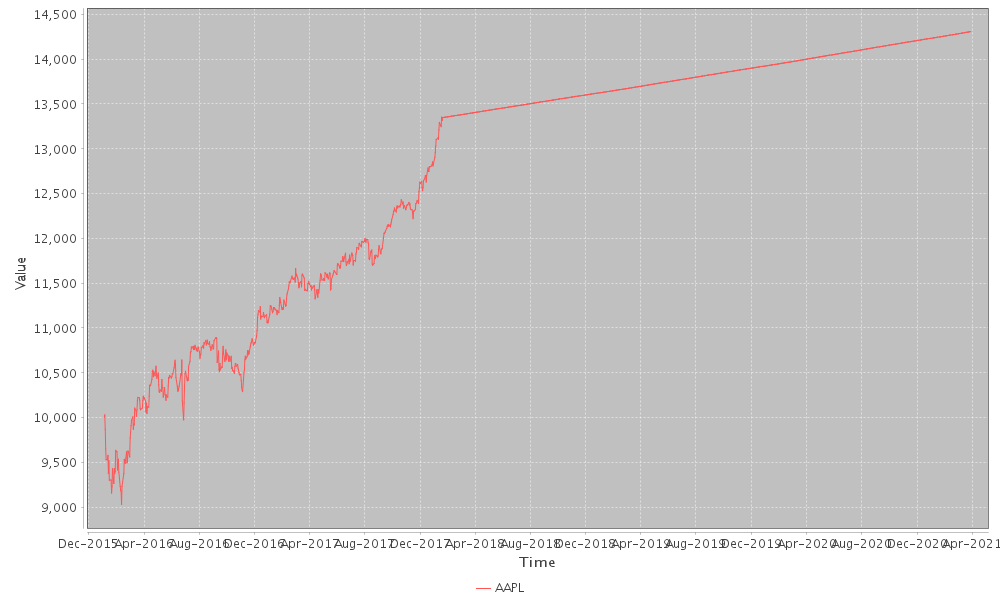

In [13]:
import ch.pschatzmann.stocks.forecasting._
import com.workday.insights.timeseries.arima.struct.ArimaParams

var aapl = new StockData(new StockID("^NYA", "INDEX"), new MarketArchiveHttpReader());
var params = new ArimaParams(1, 0, 0, 0, 0, 0, 0);
var arima = new ForecasterARIMA(params)
var aaplArima = arima.forecast(aapl, 800)

// display chart
var chart = new TimeSeriesChart()
chart.add(aaplArima.getHistory(Context.date("2016-01-01")),"AAPL")

chart

In [14]:
var result = arima.getClose()
println(result.getRMSE())
println(result.getMaxNormalizedVariance)
result.getLog()

2916.0361215978332
1097.4211097962977


{"Best ModelInterface Param" : "ModelInterface ParamsInterface:, p= 1, d= 0, q= 0, P= 0, D= 0, Q= 0, m= 0","Forecast Size" : "800","Input Size" : "13102"}


In [15]:
var result = arima.getOpen()
println(result.getRMSE())
println(result.getMaxNormalizedVariance)
result.getLog()

2915.742853883635
969.6583958825637


{"Best ModelInterface Param" : "ModelInterface ParamsInterface:, p= 1, d= 0, q= 0, P= 0, D= 0, Q= 0, m= 0","Forecast Size" : "800","Input Size" : "13102"}
